In [1]:
import cv2 as cv

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [4]:
path_hair = r'/home/zews/Downloads/male_hair.jpeg'

In [4]:
path_humanwithBg = r'/home/zews/Downloads/bg2.jpg'

In [12]:
path_7color = r'/home/zews/Downloads/7-colorful-photography.jpg'

In [15]:
imgh =cv.imread(path_7color)

In [16]:
imgh

array([[[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [  0,   4,   1],
        [ 20,   0,   1],
        [  5,   0,   2]],

       [[255, 255, 255],
        [254, 254, 254],
        [253, 253, 253],
        ...,
        [  0,  12,   6],
        [ 11,   0,   0],
        [  3,   2,   4]],

       [[254, 254, 254],
        [252, 252, 252],
        [250, 250, 250],
        ...,
        [ 31,  83,  76],
        [ 13,  12,  14],
        [  0,   1,   1]],

       ...,

       [[241, 241, 241],
        [233, 233, 233],
        [220, 220, 220],
        ...,
        [251, 251, 251],
        [255, 255, 255],
        [252, 252, 252]],

       [[244, 244, 244],
        [239, 239, 239],
        [231, 231, 231],
        ...,
        [250, 250, 250],
        [252, 252, 252],
        [254, 254, 254]],

       [[249, 249, 249],
        [245, 245, 245],
        [239, 239, 239],
        ...,
        [253, 253, 253],
        [255, 255, 255],
        [255, 255, 255]]

In [17]:
imgH = cv.cvtColor(imgh, cv.COLOR_BGR2RGB)

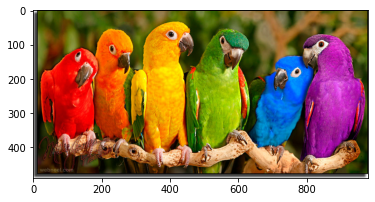

In [18]:
plt.imshow(imgH)

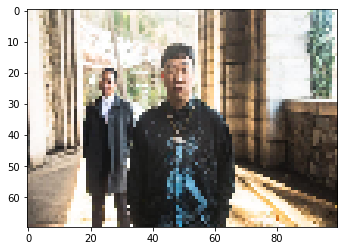

In [43]:
# resize an image
Resize = cv.resize(imgH,(100,70))
plt.imshow(Resize)

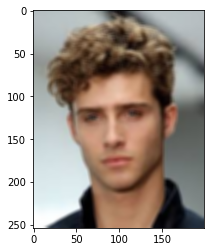

In [23]:
# 1)filter2D
# this simply takes the average of all the pixels under kernel area and replaces the central element with this average.
#same thing can be done using cv.blur() or cv.boxFilter()
kernel = np.ones((5,5),np.float32)/25
dest = cv.filter2D(imgH, -1, kernel)
# filter2D_prop(imgage, depth, kernel)
plt.imshow(dest)

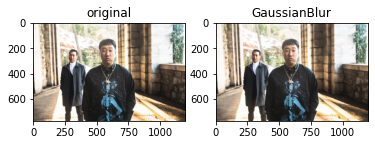

In [98]:
plt.subplot(1,2,1), plt.imshow(imgH), plt.title('original')
# plt.subplot(1,4,2), plt.imshow(dest), plt.title('filter2D')
# plt.subplot(1,3,3), plt.imshow(blur), plt.title('blur')
plt.subplot(1,2,2), plt.imshow(bilateralFilter), plt.title('GaussianBlur')
plt.show()

In [60]:
blur = cv.blur(imgH, (5,5))

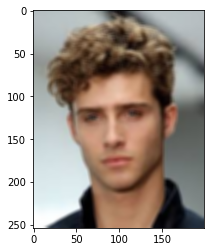

In [26]:
plt.imshow(blur)

In [85]:
gaussianBlur = cv.GaussianBlur(imgH,(15,15),1)
# helps to remove noise and details. Here kernel and sigma are involved as parameter. 

In [38]:
CannyImg = cv.Canny(imgH,270,300)
CannyImg2 = cv.Canny(imgH,50,300)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7feed7c43820>)

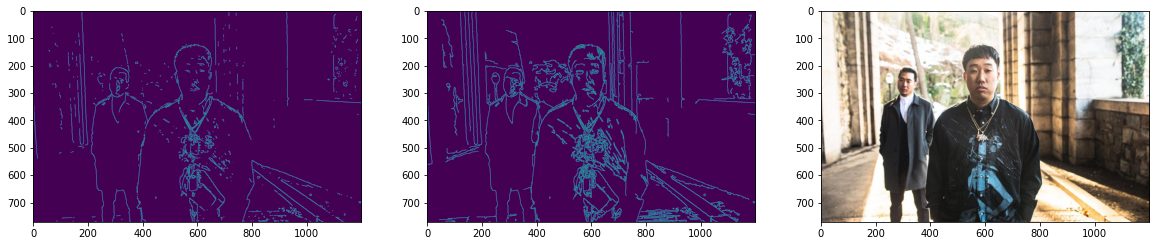

In [40]:
plt.figure(figsize=(20,10))
plt.subplot(131), plt.imshow(CannyImg)
plt.subplot(132), plt.imshow(CannyImg2)
plt.subplot(133), plt.imshow(imgH)

#eroding and dilation of image can be helpful
# plt.imshow(CannyImg)

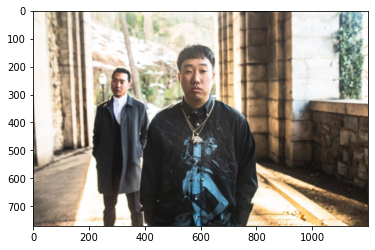

In [86]:
plt.imshow(gaussianBlur)

In [89]:
median = cv.medianBlur(imgH,5)
# remove noise 
# here with %

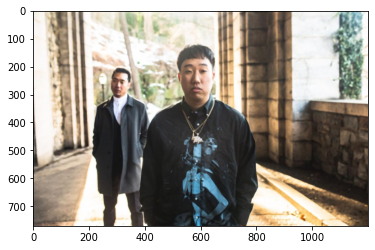

In [91]:
plt.imshow(median)

In [107]:
bilateralFilter = cv.bilateralFilter(imgH,9,75,75)
# blur texture with restoring edges

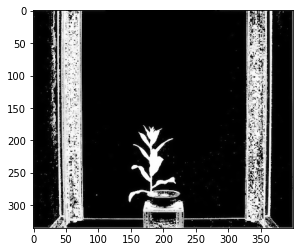

In [108]:
plt.imshow(bilateralFilter)

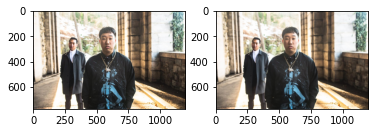

In [101]:
plt.subplot(121), plt.imshow(imgH)  
plt.subplot(122), plt.imshow(bilateralFilter)
plt.show()

In [ ]:
# wrapping imagage
width,height = 250,350
pts1 = np.float32([],[],[],[])
pts2 = np.float32([0,0],[width,0],[0, height],[width, height])
acMatrix = cv.getPerspectiveTransform(pts1,pts2)
imgWraped = cv.warpPerspective(imgH, acMatrix(width, height))

In [21]:
img_Hsv = cv.cvtColor(imgH, cv.COLOR_BGR2HSV)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f0e48541610>)

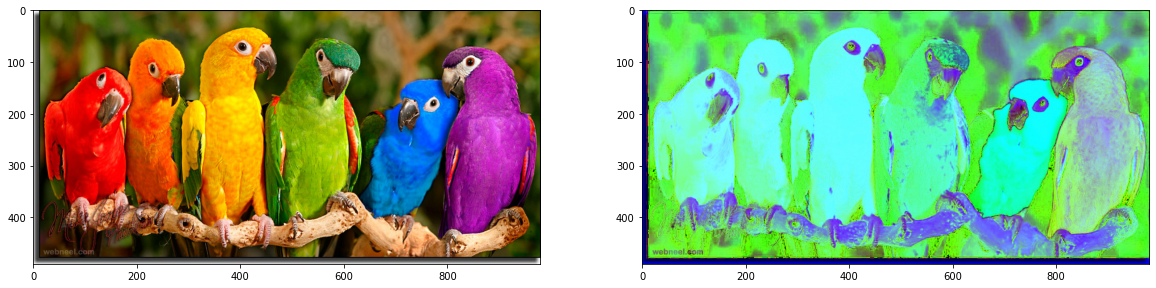

In [22]:
plt.figure(figsize=(20,10))
plt.subplot(121), plt.imshow(imgH)
plt.subplot(122), plt.imshow(img_Hsv)